In [532]:
%matplotlib inline
import sys
sys.path.append('C:/Users/User/github/Function/python/')
import eif as iso
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import copy
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style="whitegrid")
sns.set_color_codes()

In [533]:
def branch2num(branch, init_root=0):
    num = [init_root]
    for b in branch:
        if b == 'L':
            num.append(num[-1] * 2 + 1)
        if b == 'R':
            num.append(num[-1] * 2 + 2)
    return num

In [534]:
def gen_graph(branches, g = None, init_root = 0, pre = ''):
    num_branches = [branch2num(i, init_root) for i in branches]
    all_nodes = [j for branch in num_branches for j in branch]
    all_nodes = np.unique(all_nodes)
    all_nodes = all_nodes.tolist()
    if g is None:
        g=ig.Graph()
    for k in all_nodes : g.add_vertex(pre+str(k))
    t=[]
    for j in range(len(branches)):
        branch = branch2num(branches[j], init_root)
        for i in range(len(branch)-1):
            pair = [branch[i],branch[i+1]]
            if pair not in t:
                t.append(pair)
                g.add_edge(pre+str(branch[i]),pre+str(branch[i+1]))
    return g,max(all_nodes)

In [535]:
df_tr_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph1_bytime.csv", encoding='cp949')
df_ts_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_in.csv", encoding='cp949')
df_ts_2 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_out.csv", encoding='cp949')

In [536]:
df_tr = df_tr_1.replace('Normal', 0)
df_ts_1 = df_ts_1.replace('정상', 0)
df_ts_1 = df_ts_1.replace('이상', 1)
df_ts_2 = df_ts_2.replace('정상', 0)
df_ts_2 = df_ts_2.replace('이상', 1)

In [537]:
df_tr_1 = df_tr_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_1 = df_ts_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_2 = df_ts_2.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})

df_tr_1.set_index(['Normal/Abnormal', 'TIME_STAMP'], inplace=True)
df_ts_1.set_index(['Normal/Abnormal', 'TIME_STAMP'], inplace=True)
df_ts_2.set_index(['Normal/Abnormal', 'TIME_STAMP'], inplace=True)

In [538]:
df_tr = df_tr_1.iloc[:, 7:49] # train
df_ts = pd.concat([df_ts_1.iloc[:,7:49], df_ts_2.iloc[:,7:49]])

In [539]:
df_tr_x = df_tr.iloc[:,:-1]
df_ts_x = df_ts.iloc[:,:-1]

In [540]:
df_tr_x = df_tr_x.reset_index(drop = True)
df_tr_x = np.array(df_tr_x)
df_ts_x = df_ts_x.reset_index(drop = True)
df_ts_x = np.array(df_ts_x)

In [541]:
F0  = iso.iForest(df_tr_x, ntrees=100, limit=8, sample_size=256, ExtensionLevel=0) # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iso.iForest(df_tr_x, ntrees=100, limit=8, sample_size=256, ExtensionLevel=1)
F2  = iso.iForest(df_tr_x, ntrees=100, limit=8, sample_size=256, ExtensionLevel=2)

In [542]:
S0 = F0.compute_paths(X_in=df_ts_x)
S1 = F1.compute_paths(X_in=df_ts_x)
S2 = F2.compute_paths(X_in=df_ts_x)

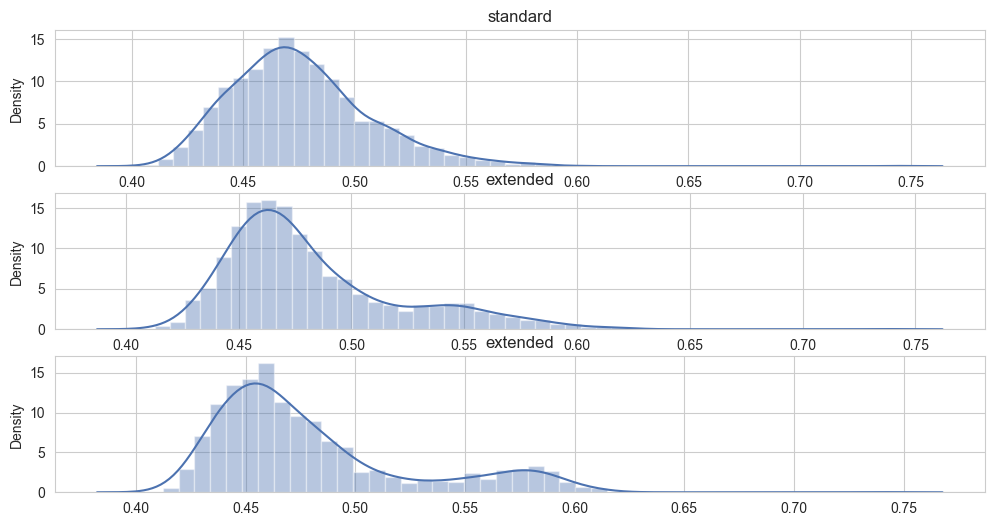

In [543]:
f = plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
sns.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(3,1,2)
sns.distplot(S1, kde=True, color="b")
plt.title('extended')

plt.subplot(3,1,3)
sns.distplot(S2, kde=True, color="b")
plt.title('extended')
plt.show()

In [553]:
test = pd.DataFrame(pd.concat([df_ts_1.reset_index(), df_ts_2.reset_index()], axis=0).iloc[:,50])

In [554]:
total1 = pd.concat([test.reset_index(drop=True),pd.DataFrame(S0).reset_index(drop = True)], axis = 1)
total2 = pd.concat([test.reset_index(drop=True),pd.DataFrame(S1).reset_index(drop = True)], axis = 1)
total3 = pd.concat([test.reset_index(drop=True),pd.DataFrame(S2).reset_index(drop = True)], axis = 1)

<AxesSubplot: ylabel='0'>

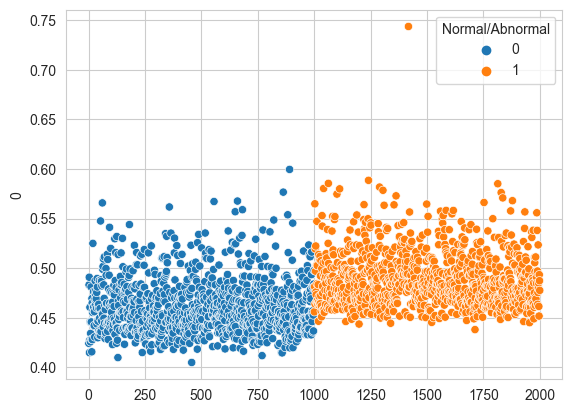

In [555]:
sns.scatterplot(data = total1, x = list(range(1,2001)), y = total1.iloc[:,1],
            hue='Normal/Abnormal')

<AxesSubplot: ylabel='0'>

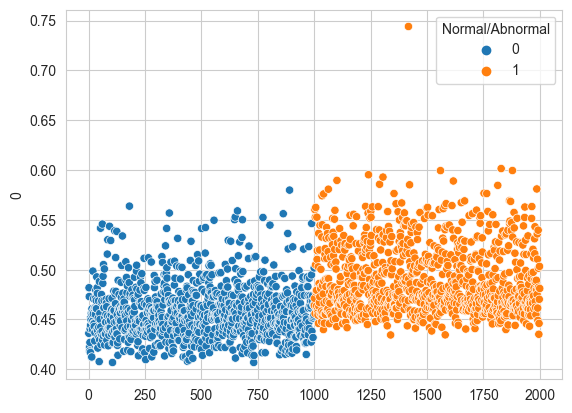

In [ ]:
sns.scatterplot(data = total2, x = list(range(1,2001)), y = total1.iloc[:,1],
            hue='Normal/Abnormal')

<AxesSubplot: ylabel='0'>

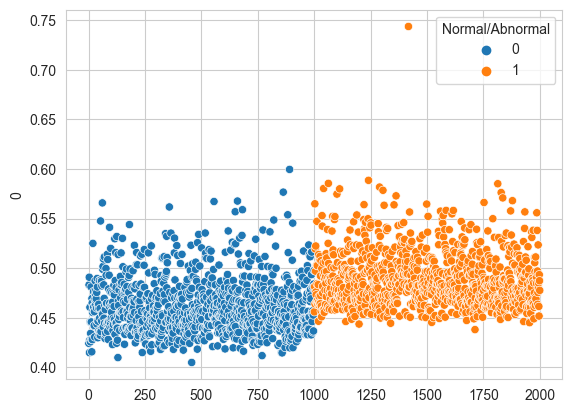

In [556]:
sns.scatterplot(data = total3, x = list(range(1,2001)), y = total1.iloc[:,1],
            hue='Normal/Abnormal')

In [558]:
control = 0.5